In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Load Dataset
[Predict students' dropout and academic success](https://archive.ics.uci.edu/dataset/697/predict+students+dropout+and+academic+success)

In [3]:
df = pd.read_csv('data/data.csv', sep=";")

### Convert Target
Convert target as follows
- 0 : Enrolled + Graduate
- 1 : Dropout

In [4]:
df['Target'] = np.where((df.Target == 'Enrolled') | (df.Target == 'Graduate'),
             'Enrolled + Graduate', df.Target)

### Create mapping for each label encoded data

In [5]:
data = {1:'single', 2:'married', 3:'widower', 4:'divorced', 5:'facto union', 6:'legally separated'}
marital_status_mapping = pd.DataFrame([data]).T.reset_index().\
rename(columns = {'index':'Value', 0:'Marital_Status'})[['Marital_Status', 'Value']]

In [6]:
data = {1:"1st phase - general contingent", 2:"Ordinance No. 612/93", 5:"1st phase - special contingent (Azores Island)",  
        7:"Holders of other higher courses", 10:"Ordinance No. 854-B/99", 15:"International student (bachelor)",
        16:"1st phase - special contingent (Madeira Island)", 17:"2nd phase - general contingent",
        18:"3rd phase - general contingent",26:"Ordinance No. 533-A/99, item b2) (Different Plan)", 
        27:"Ordinance No. 533-A/99, item b3 (Other Institution)", 39:"Over 23 years old", 42:"Transfer",
        43:"Change of course", 44:"Technological specialization diploma holders",
        51:"Change of institution/course", 53:"Short cycle diploma holders",
        57: "Change of institution/course (International)"}
application_mode_mapping = pd.DataFrame([data]).T.reset_index()\
.rename(columns={'index':"Value", 0:'application_mode'})[['application_mode', "Value"]]

In [7]:
data = {33:"Biofuel Production Technologies", 171:"Animation and Multimedia Design", 
        8014:"Social Service (evening attendance)", 9003:"Agronomy", 9070:"Communication Design",
        9085:"Veterinary Nursing", 9119:"Informatics Engineering", 9130:"Equinculture", 
        9147:"Management", 9238:"Social Service", 9254:"Tourism", 9500:"Nursing",
        9556:"Oral Hygiene", 9670:"Advertising and Marketing Management",
        9773:"Journalism and Communication", 9853:"Basic Education", 9991:"Management (evening attendance)"}
course_mapping = pd.DataFrame([data]).T.reset_index()\
.rename(columns={'index':"Value", 0:'course'})[['course', "Value"]]

In [8]:
data = {
    1: "Secondary education",
    2: "Higher education - bachelor's degree",
    3: "Higher education - degree",
    4: "Higher education - master's",
    5: "Higher education - doctorate",
    6: "Frequency of higher education",
    9: "12th year of schooling - not completed",
    10: "11th year of schooling - not completed",
    12: "Other - 11th year of schooling",
    14: "10th year of schooling",
    15: "10th year of schooling - not completed",
    19: "Basic education 3rd cycle (9th/10th/11th year) or equiv.",
    38: "Basic education 2nd cycle (6th/7th/8th year) or equiv.",
    39: "Technological specialization course",
    40: "Higher education - degree (1st cycle)",
    42: "Professional higher technical course",
    43: "Higher education - master (2nd cycle)"
}
previous_qualification_mapping = pd.DataFrame([data]).T.reset_index()\
.rename(columns={'index':"Value", 0:'previous_qualification'})[['previous_qualification', "Value"]]

In [9]:
data = {
    1: 'Portuguese',
    2: 'German',
    6: 'Spanish',
    11: 'Italian',
    13: 'Dutch',
    14: 'English',
    17: 'Lithuanian',
    21: 'Angolan',
    22: 'Cape Verdean',
    24: 'Guinean',
    25: 'Mozambican',
    26: 'Santomean',
    32: 'Turkish',
    41: 'Brazilian',
    62: 'Romanian',
    100: 'Moldova (Republic of)',
    101: 'Mexican',
    103: 'Ukrainian',
    105: 'Russian',
    108: 'Cuban',
    109: 'Colombian'
}
nationality_mapping = pd.DataFrame([data]).T.reset_index()\
.rename(columns={'index':"Value", 0:'nationality'})[['nationality', "Value"]]

In [10]:
data = {
    1: "Secondary Education - 12th Year of Schooling or Eq.",
    2: "Higher Education - Bachelor's Degree",
    3: "Higher Education - Degree",
    4: "Higher Education - Master's",
    5: "Higher Education - Doctorate",
    6: "Frequency of Higher Education",
    9: "12th Year of Schooling - Not Completed",
    10: "11th Year of Schooling - Not Completed",
    11: "7th Year (Old)",
    12: "Other - 11th Year of Schooling",
    14: "10th Year of Schooling",
    18: "General commerce course",
    19: "Basic Education 3rd Cycle (9th/10th/11th Year) or Equiv.",
    22: "Technical-professional course",
    26: "7th year of schooling",
    27: "2nd cycle of the general high school course",
    29: "9th Year of Schooling - Not Completed",
    30: "8th year of schooling",
    34: "Unknown",
    35: "Can't read or write",
    36: "Can read without having a 4th year of schooling",
    37: "Basic education 1st cycle (4th/5th year) or equiv.",
    38: "Basic Education 2nd Cycle (6th/7th/8th Year) or Equiv.",
    39: "Technological specialization course",
    40: "Higher education - degree (1st cycle)",
    41: "Specialized higher studies course",
    42: "Professional higher technical course",
    43: "Higher Education - Master (2nd cycle)",
    44: "Higher Education - Doctorate (3rd cycle)"
}
mothers_qualification_mapping = pd.DataFrame([data]).T.reset_index()\
.rename(columns={'index':"Value", 0:'mothers_qualification'})[['mothers_qualification', "Value"]]

In [11]:
data = {
    1: "Secondary Education - 12th Year of Schooling or Eq.",
    2: "Higher Education - Bachelor's Degree",
    3: "Higher Education - Degree",
    4: "Higher Education - Master's",
    5: "Higher Education - Doctorate",
    6: "Frequency of Higher Education",
    9: "12th Year of Schooling - Not Completed",
    10: "11th Year of Schooling - Not Completed",
    11: "7th Year (Old)",
    12: "Other - 11th Year of Schooling",
    13: "2nd year complementary high school course",
    14: "10th Year of Schooling",
    18: "General commerce course",
    19: "Basic Education 3rd Cycle (9th/10th/11th Year) or Equiv.",
    20: "Complementary High School Course",
    22: "Technical-professional course",
    25: "Complementary High School Course - not concluded",
    26: "7th year of schooling",
    27: "2nd cycle of the general high school course",
    29: "9th Year of Schooling - Not Completed",
    30: "8th year of schooling",
    31: "General Course of Administration and Commerce",
    33: "Supplementary Accounting and Administration",
    34: "Unknown",
    35: "Can't read or write",
    36: "Can read without having a 4th year of schooling",
    37: "Basic education 1st cycle (4th/5th year) or equiv.",
    38: "Basic Education 2nd Cycle (6th/7th/8th Year) or Equiv.",
    39: "Technological specialization course",
    40: "Higher education - degree (1st cycle)",
    41: "Specialized higher studies course",
    42: "Professional higher technical course",
    43: "Higher Education - Master (2nd cycle)",
    44: "Higher Education - Doctorate (3rd cycle)"
}
fathers_qualification_mapping = pd.DataFrame([data]).T.reset_index()\
.rename(columns={'index':"Value", 0:'fathers_qualification'})[['fathers_qualification', "Value"]]

In [12]:
data = {
    0: "Student",
    1: "Representatives of the Legislative Power and Executive Bodies, Directors, Directors and Executive Managers",
    2: "Specialists in Intellectual and Scientific Activities",
    3: "Intermediate Level Technicians and Professions",
    4: "Administrative staff",
    5: "Personal Services, Security and Safety Workers and Sellers",
    6: "Farmers and Skilled Workers in Agriculture, Fisheries and Forestry",
    7: "Skilled Workers in Industry, Construction and Craftsmen",
    8: "Installation and Machine Operators and Assembly Workers",
    9: "Unskilled Workers",
    10: "Armed Forces Professions",
    90: "Other Situation",
    99: "(blank)",
    122: "Health professionals",
    123: "Teachers",
    125: "Specialists in information and communication technologies (ICT)",
    131: "Intermediate level science and engineering technicians and professions",
    132: "Technicians and professionals, of intermediate level of health",
    134: "Intermediate level technicians from legal, social, sports, cultural and similar services",
    141: "Office workers, secretaries in general and data processing operators",
    143: "Data, accounting, statistical, financial services and registry-related operators",
    144: "Other administrative support staff",
    151: "Personal service workers",
    152: "Sellers",
    153: "Personal care workers and the like",
    171: "Skilled construction workers and the like, except electricians",
    173: "Skilled workers in printing, precision instrument manufacturing, jewelers, artisans and the like",
    175: "Workers in food processing, woodworking, clothing and other industries and crafts",
    191: "Cleaning workers",
    192: "Unskilled workers in agriculture, animal production, fisheries and forestry",
    193: "Unskilled workers in extractive industry, construction, manufacturing and transport",
    194: "Meal preparation assistants"
}
mothers_occupation_mapping = pd.DataFrame([data]).T.reset_index()\
.rename(columns={'index':"Value", 0:'mothers_occupation'})[['mothers_occupation', "Value"]]

In [13]:
data = {
    0: "Student",
    1: "Representatives of the Legislative Power and Executive Bodies, Directors, Directors and Executive Managers",
    2: "Specialists in Intellectual and Scientific Activities",
    3: "Intermediate Level Technicians and Professions",
    4: "Administrative staff",
    5: "Personal Services, Security and Safety Workers and Sellers",
    6: "Farmers and Skilled Workers in Agriculture, Fisheries and Forestry",
    7: "Skilled Workers in Industry, Construction and Craftsmen",
    8: "Installation and Machine Operators and Assembly Workers",
    9: "Unskilled Workers",
    10: "Armed Forces Professions",
    90: "Other Situation",
    99: "(blank)",
    101: "Armed Forces Officers",
    102: "Armed Forces Sergeants",
    103: "Other Armed Forces personnel",
    112: "Directors of administrative and commercial services",
    114: "Hotel, catering, trade and other services directors",
    121: "Specialists in the physical sciences, mathematics, engineering and related techniques",
    122: "Health professionals",
    123: "Teachers",
    124: "Specialists in finance, accounting, administrative organization, public and commercial relations",
    131: "Intermediate level science and engineering technicians and professions",
    132: "Technicians and professionals, of intermediate level of health",
    134: "Intermediate level technicians from legal, social, sports, cultural and similar services",
    135: "Information and communication technology technicians",
    141: "Office workers, secretaries in general and data processing operators",
    143: "Data, accounting, statistical, financial services and registry-related operators",
    144: "Other administrative support staff",
    151: "Personal service workers",
    152: "Sellers",
    153: "Personal care workers and the like",
    154: "Protection and security services personnel",
    161: "Market-oriented farmers and skilled agricultural and animal production workers",
    163: "Farmers, livestock keepers, fishermen, hunters and gatherers, subsistence",
    171: "Skilled construction workers and the like, except electricians",
    172: "Skilled workers in metallurgy, metalworking and similar",
    174: "Skilled workers in electricity and electronics",
    175: "Workers in food processing, woodworking, clothing and other industries and crafts",
    181: "Fixed plant and machine operators",
    182: "Assembly workers",
    183: "Vehicle drivers and mobile equipment operators",
    192: "Unskilled workers in agriculture, animal production, fisheries and forestry",
    193: "Unskilled workers in extractive industry, construction, manufacturing and transport",
    194: "Meal preparation assistants",
    195: "Street vendors (except food) and street service providers"
}
fathers_occupation_mapping = pd.DataFrame([data]).T.reset_index()\
.rename(columns={'index':"Value", 0:'fathers_occupation'})[['fathers_occupation', "Value"]]

### Check for missing values

In [14]:
for k in df.columns:
    print(k, ':', df[k].isna().sum())

Marital status : 0
Application mode : 0
Application order : 0
Course : 0
Daytime/evening attendance	 : 0
Previous qualification : 0
Previous qualification (grade) : 0
Nacionality : 0
Mother's qualification : 0
Father's qualification : 0
Mother's occupation : 0
Father's occupation : 0
Admission grade : 0
Displaced : 0
Educational special needs : 0
Debtor : 0
Tuition fees up to date : 0
Gender : 0
Scholarship holder : 0
Age at enrollment : 0
International : 0
Curricular units 1st sem (credited) : 0
Curricular units 1st sem (enrolled) : 0
Curricular units 1st sem (evaluations) : 0
Curricular units 1st sem (approved) : 0
Curricular units 1st sem (grade) : 0
Curricular units 1st sem (without evaluations) : 0
Curricular units 2nd sem (credited) : 0
Curricular units 2nd sem (enrolled) : 0
Curricular units 2nd sem (evaluations) : 0
Curricular units 2nd sem (approved) : 0
Curricular units 2nd sem (grade) : 0
Curricular units 2nd sem (without evaluations) : 0
Unemployment rate : 0
Inflation rate

## EDA

In [15]:
df_grouped = df.groupby('Target').count().reset_index()[['Target','Marital status']].\
rename(columns={'Marital status':'Count'})
df_grouped

,Target,Count
0,Dropout,1421
1,Enrolled + Graduate,3003


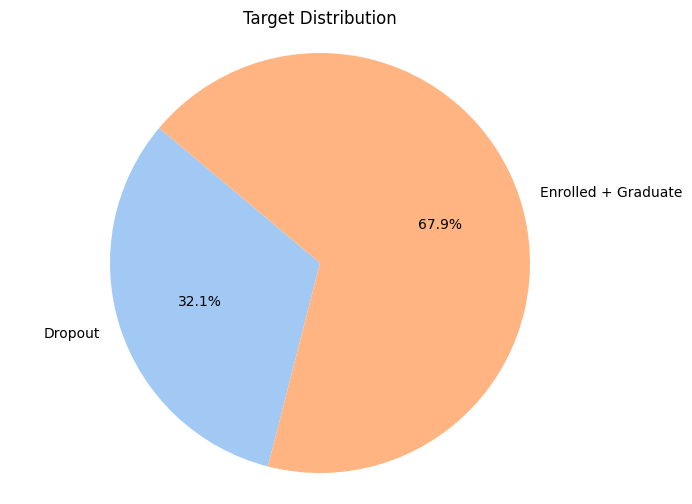

In [17]:
plt.figure(figsize=(8, 6))
sns.set_palette('pastel')
plt.pie(df_grouped['Count'], labels=df_grouped['Target'], autopct='%1.1f%%', startangle=140)
plt.title('Target Distribution')
plt.axis('equal')

# Save the plot
plt.savefig('images/target_distribution.png', dpi=300, bbox_inches='tight')

plt.show()

### How categorical features vary with Target?

Stacked bar plots will be used to visualize the variations

#### Marital Status

In [18]:
cat_df = df[['Marital status', 'Target']].set_index('Marital status').join(marital_status_mapping.set_index('Value'))

In [19]:
cross_tab = pd.crosstab(cat_df['Marital_Status'], cat_df['Target'])

In [20]:
cross_tab_normalize = pd.crosstab(cat_df['Marital_Status'], cat_df['Target'], normalize='index') * 100

In [21]:
cross_tab_normalize

Target,Dropout,Enrolled + Graduate
Marital_Status,,
divorced,46.153846,53.846154
facto union,44.000000,56.000000
legally separated,66.666667,33.333333
married,47.229551,52.770449
single,30.211789,69.788211
widower,25.000000,75.000000


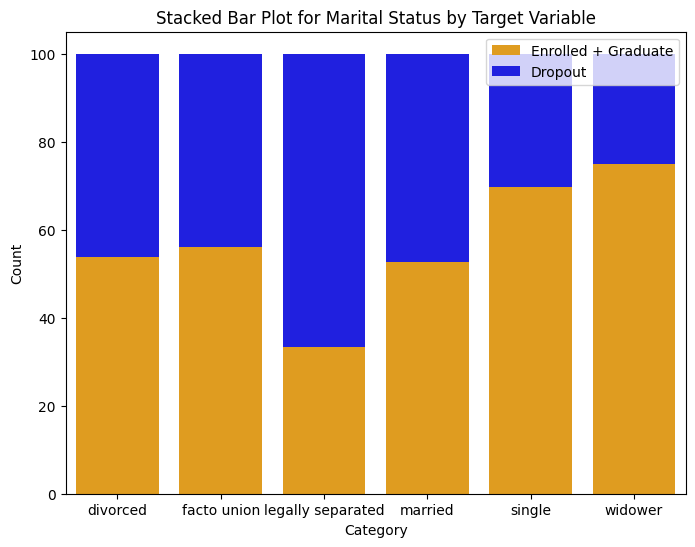

In [22]:
# Plot the stacked bar plot
plt.figure(figsize=(8, 6))
sns.set_palette('pastel')
sns.barplot(x=cross_tab_normalize.index, y=cross_tab_normalize['Enrolled + Graduate'], color='orange', 
            label='Enrolled + Graduate')
sns.barplot(x=cross_tab_normalize.index, y=cross_tab_normalize['Dropout'], color='blue', label='Dropout',
            bottom=cross_tab_normalize['Enrolled + Graduate'])
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Stacked Bar Plot for Marital Status by Target Variable')
plt.legend()

# Save the plot
plt.savefig('images/marital_status_by_target.png', dpi=300, bbox_inches='tight')

plt.show()

In [32]:
cross_tab_normalize[cross_tab_normalize.Dropout > 70]

Target,Dropout,Enrolled + Graduate
Marital_Status,,


- Legally separated persons are highly likely to drop out.
- Facto unions and single persons are highly likely to graduate.
- Widowers have a tendency to be enrolled.
- This feature can be helpful to differentiate between dropout and graduate but doesn't draw a clear separation for enrolled.

#### Application mode

In [33]:
cat_df = df[['Application mode', 'Target']].set_index('Application mode')\
.join(application_mode_mapping.set_index('Value'))

In [34]:
cross_tab = pd.crosstab(cat_df.index.astype(str), cat_df['Target'])

In [35]:
cross_tab_normalize = pd.crosstab(cat_df.index.astype(str), cat_df['Target'], normalize='index') * 100

In [36]:
cross_tab_normalize

Target,Dropout,Enrolled + Graduate
row_0,,
1,20.199063,79.800937
10,30.000000,70.000000
15,16.666667,83.333333
16,13.157895,86.842105
17,29.357798,70.642202
18,36.290323,63.709677
2,66.666667,33.333333
26,100.000000,0.000000
27,100.000000,0.000000


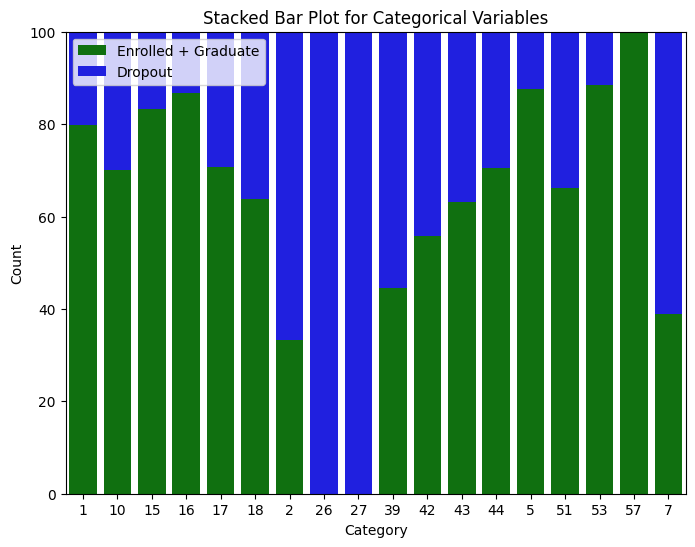

In [37]:
# Plot the stacked bar plot
plt.figure(figsize=(8, 6))
sns.set_palette('pastel')
sns.barplot(x=cross_tab_normalize.index, y=cross_tab_normalize['Enrolled + Graduate'], color='green', 
            label='Enrolled + Graduate')
sns.barplot(x=cross_tab_normalize.index, y=cross_tab_normalize['Dropout'], color='blue', label='Dropout',
            bottom=cross_tab_normalize['Enrolled + Graduate'])
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Stacked Bar Plot for Categorical Variables')
plt.legend()
plt.show()

In [38]:
cross_tab_normalize[cross_tab_normalize.Dropout > 70]

Target,Dropout,Enrolled + Graduate
row_0,,
26,100.0,0.0
27,100.0,0.0


In [39]:
application_mode_mapping[application_mode_mapping.Value.isin([26, 27])]

,application_mode,Value
9,"Ordinance No. 533-A/99, item b2) (Different Plan)",26
10,"Ordinance No. 533-A/99, item b3 (Other Institu...",27


- Applicants with an application mode as **Ordinance No. 533-A/99, item b2) (Different Plan)** and **Ordinance No. 533-A/99, item b3 (Other Institution)** are extremly likely to dropout hence these 2 categories can play vital role in predicting dropouts.

#### Course

In [40]:
cat_df = df[['Course', 'Target']].set_index('Course')\
.join(course_mapping.set_index('Value'))

In [41]:
cross_tab = pd.crosstab(cat_df.index.astype(str), cat_df['Target'])

In [42]:
cross_tab_normalize = pd.crosstab(cat_df.index.astype(str), cat_df['Target'], normalize='index') * 100

In [43]:
cross_tab_normalize

Target,Dropout,Enrolled + Graduate
row_0,,
171,38.139535,61.860465
33,66.666667,33.333333
8014,33.023256,66.976744
9003,40.952381,59.047619
9070,22.566372,77.433628
9085,26.706231,73.293769
9119,54.117647,45.882353
9130,55.319149,44.680851
9147,35.263158,64.736842


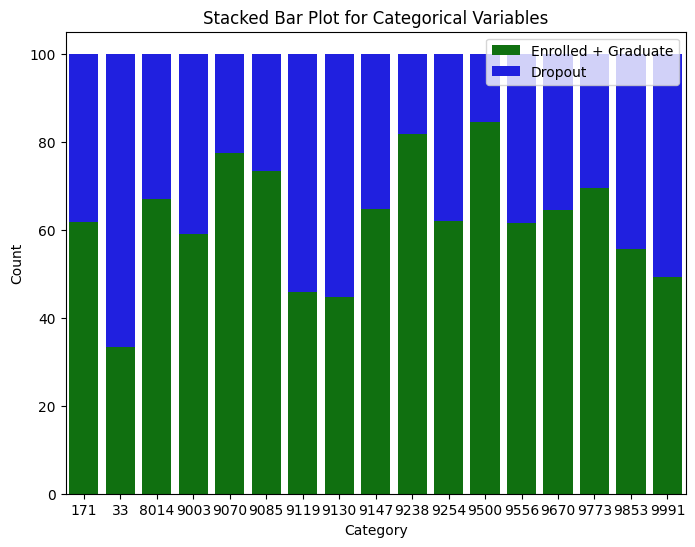

In [44]:
plt.figure(figsize=(8, 6))
sns.set_palette('pastel')
sns.barplot(x=cross_tab_normalize.index, y=cross_tab_normalize['Enrolled + Graduate'], color='green', 
            label='Enrolled + Graduate')
sns.barplot(x=cross_tab_normalize.index, y=cross_tab_normalize['Dropout'], color='blue', label='Dropout',
            bottom=cross_tab_normalize['Enrolled + Graduate'])
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Stacked Bar Plot for Categorical Variables')
plt.legend()
plt.show()

In [45]:
cross_tab_normalize[cross_tab_normalize.Dropout > 70]

Target,Dropout,Enrolled + Graduate
row_0,,


In [46]:
course_mapping[course_mapping.Value.isin([33])]

,course,Value
0,Biofuel Production Technologies,33


- Students enrolled in **Biofuel Production Technologies** are highly likey to dropout.

#### Daytime/evening attendance

In [47]:
cat_df = df[['Daytime/evening attendance\t', 'Target']].set_index('Daytime/evening attendance\t')
cross_tab = pd.crosstab(cat_df.index.astype(str), cat_df['Target'])
cross_tab_normalize = pd.crosstab(cat_df.index.astype(str), cat_df['Target'], normalize='index') * 100

In [48]:
cross_tab_normalize

Target,Dropout,Enrolled + Graduate
row_0,,
0,42.857143,57.142857
1,30.804364,69.195636


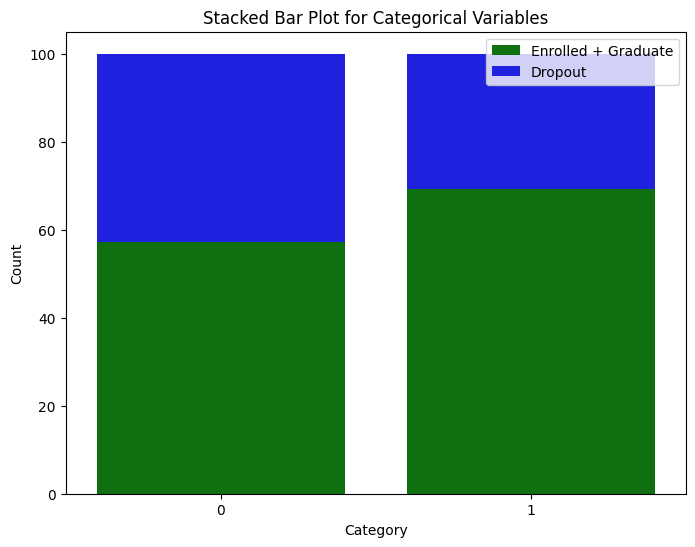

In [49]:
plt.figure(figsize=(8, 6))
sns.set_palette('pastel')
sns.barplot(x=cross_tab_normalize.index, y=cross_tab_normalize['Enrolled + Graduate'], color='green', 
            label='Enrolled + Graduate')
sns.barplot(x=cross_tab_normalize.index, y=cross_tab_normalize['Dropout'], color='blue', label='Dropout',
            bottom=cross_tab_normalize['Enrolled + Graduate'])
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Stacked Bar Plot for Categorical Variables')
plt.legend()
plt.show()

In [50]:
cross_tab_normalize[cross_tab_normalize.Dropout > 70]

Target,Dropout,Enrolled + Graduate
row_0,,


#### Previous qualification

In [51]:
cat_df = df[['Previous qualification', 'Target']].set_index('Previous qualification')\
.join(previous_qualification_mapping.set_index('Value'))

In [52]:
cross_tab = pd.crosstab(cat_df.index.astype(str), cat_df['Target'])
cross_tab_normalize = pd.crosstab(cat_df.index.astype(str), cat_df['Target'], normalize='index') * 100

In [53]:
cross_tab_normalize

Target,Dropout,Enrolled + Graduate
row_0,,
1,29.001883,70.998117
10,75.000000,25.000000
12,57.777778,42.222222
14,100.000000,0.000000
15,50.000000,50.000000
19,64.197531,35.802469
2,69.565217,30.434783
3,59.523810,40.476190
38,42.857143,57.142857


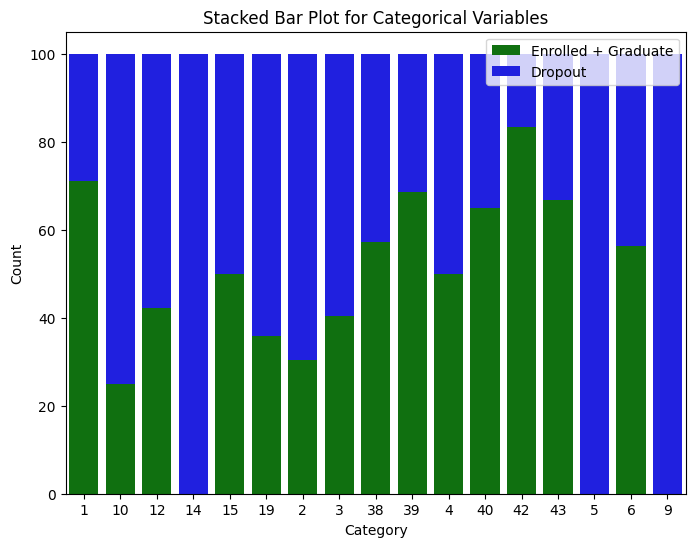

In [54]:
plt.figure(figsize=(8, 6))
sns.set_palette('pastel')
sns.barplot(x=cross_tab_normalize.index, y=cross_tab_normalize['Enrolled + Graduate'], color='green', 
            label='Enrolled + Graduate')
sns.barplot(x=cross_tab_normalize.index, y=cross_tab_normalize['Dropout'], color='blue', label='Dropout',
            bottom=cross_tab_normalize['Enrolled + Graduate'])
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Stacked Bar Plot for Categorical Variables')
plt.legend()
plt.show()

In [55]:
cross_tab_normalize[cross_tab_normalize.Dropout > 70]

Target,Dropout,Enrolled + Graduate
row_0,,
10,75.0,25.0
14,100.0,0.0
5,100.0,0.0
9,100.0,0.0


In [56]:
previous_qualification_mapping[previous_qualification_mapping.Value.isin([10, 14, 5, 9])]

,previous_qualification,Value
4,Higher education - doctorate,5
6,12th year of schooling - not completed,9
7,11th year of schooling - not completed,10
9,10th year of schooling,14


- Candiadates with education as **Higher education - doctorate**, **12th year of schooling - not completed**, 
**11th year of schooling - not completed** and **10th year of schooling** are most likely to dropuout

#### Nacionality

In [57]:
cat_df = df[['Nacionality', 'Target']].set_index('Nacionality')\
.join(nationality_mapping.set_index('Value'))

In [58]:
cross_tab = pd.crosstab(cat_df.index.astype(str), cat_df['Target'])
cross_tab_normalize = pd.crosstab(cat_df.index.astype(str), cat_df['Target'], normalize='index') * 100

In [59]:
cross_tab_normalize

Target,Dropout,Enrolled + Graduate
row_0,,
1,32.197497,67.802503
100,66.666667,33.333333
101,50.000000,50.000000
103,33.333333,66.666667
105,50.000000,50.000000
108,0.000000,100.000000
109,100.000000,0.000000
11,0.000000,100.000000
13,0.000000,100.000000


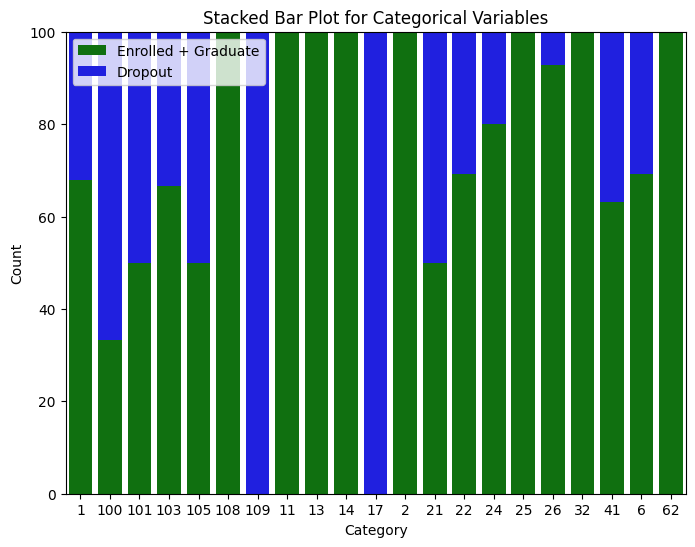

In [60]:
plt.figure(figsize=(8, 6))
sns.set_palette('pastel')
sns.barplot(x=cross_tab_normalize.index, y=cross_tab_normalize['Enrolled + Graduate'], color='green', 
            label='Enrolled + Graduate')
sns.barplot(x=cross_tab_normalize.index, y=cross_tab_normalize['Dropout'], color='blue', label='Dropout',
            bottom=cross_tab_normalize['Enrolled + Graduate'])
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Stacked Bar Plot for Categorical Variables')
plt.legend()
plt.show()

In [61]:
cross_tab_normalize[cross_tab_normalize.Dropout > 70]

Target,Dropout,Enrolled + Graduate
row_0,,
109,100.0,0.0
17,100.0,0.0


In [62]:
nationality_mapping[nationality_mapping.Value.isin([109, 17])]

,nationality,Value
6,Lithuanian,17
20,Colombian,109


- Candidates with **Lithuanian** and **Colombian** nationality are highly likely to drop out

#### Mother\'s qualification

In [63]:
cat_df = df[['Mother\'s qualification', 'Target']].set_index('Mother\'s qualification')\
.join(mothers_qualification_mapping.set_index('Value'))

In [64]:
cross_tab = pd.crosstab(cat_df.index.astype(str), cat_df['Target'])
cross_tab_normalize = pd.crosstab(cat_df.index.astype(str), cat_df['Target'], normalize='index') * 100

In [65]:
cross_tab_normalize

Target,Dropout,Enrolled + Graduate
row_0,,
1,28.063611,71.936389
10,66.666667,33.333333
11,66.666667,33.333333
12,52.380952,47.619048
14,50.000000,50.000000
18,100.000000,0.000000
19,28.436516,71.563484
2,24.096386,75.903614
22,0.000000,100.000000


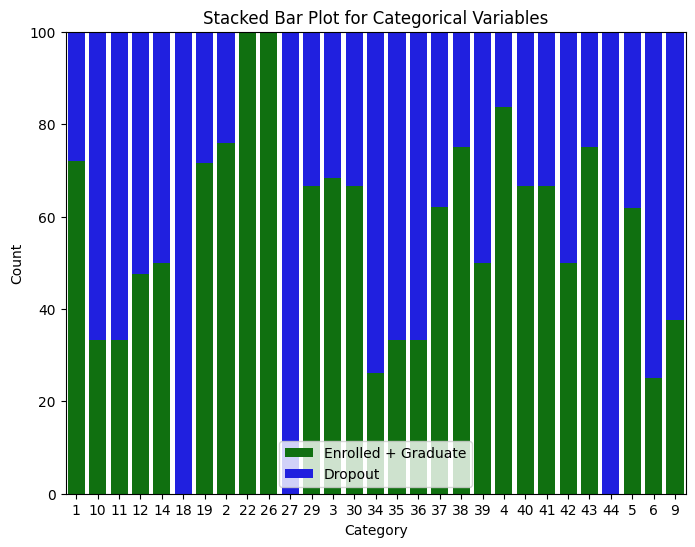

In [66]:
plt.figure(figsize=(8, 6))
sns.set_palette('pastel')
sns.barplot(x=cross_tab_normalize.index, y=cross_tab_normalize['Enrolled + Graduate'], color='green', 
            label='Enrolled + Graduate')
sns.barplot(x=cross_tab_normalize.index, y=cross_tab_normalize['Dropout'], color='blue', label='Dropout',
            bottom=cross_tab_normalize['Enrolled + Graduate'])
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Stacked Bar Plot for Categorical Variables')
plt.legend()
plt.show()

In [67]:
cross_tab_normalize[cross_tab_normalize.Dropout > 70]

Target,Dropout,Enrolled + Graduate
row_0,,
18,100.000000,0.000000
27,100.000000,0.000000
34,73.846154,26.153846
44,100.000000,0.000000
6,75.000000,25.000000


In [68]:
mothers_qualification_mapping[mothers_qualification_mapping.Value.isin([18, 27, 34, 44, 6])]

,mothers_qualification,Value
5,Frequency of Higher Education,6
11,General commerce course,18
15,2nd cycle of the general high school course,27
18,Unknown,34
28,Higher Education - Doctorate (3rd cycle),44


Candidates with mother's qualification as **Frequency of Higher Education**, **General commerce course**, 
**2nd cycle of the general high school course**, **Higher Education - Doctorate (3rd cycle)** and **Unknown**
are highly likely to drop out.

#### Father\'s qualification

In [69]:
cat_df = df[['Father\'s qualification', 'Target']].set_index('Father\'s qualification')\
.join(fathers_qualification_mapping.set_index('Value'))

In [70]:
cross_tab = pd.crosstab(cat_df.index.astype(str), cat_df['Target'])
cross_tab_normalize = pd.crosstab(cat_df.index.astype(str), cat_df['Target'], normalize='index') * 100

In [71]:
cross_tab_normalize

Target,Dropout,Enrolled + Graduate
row_0,,
1,31.084071,68.915929
10,100.000000,0.000000
11,40.000000,60.000000
12,36.842105,63.157895
13,100.000000,0.000000
14,25.000000,75.000000
18,100.000000,0.000000
19,27.272727,72.727273
2,32.352941,67.647059


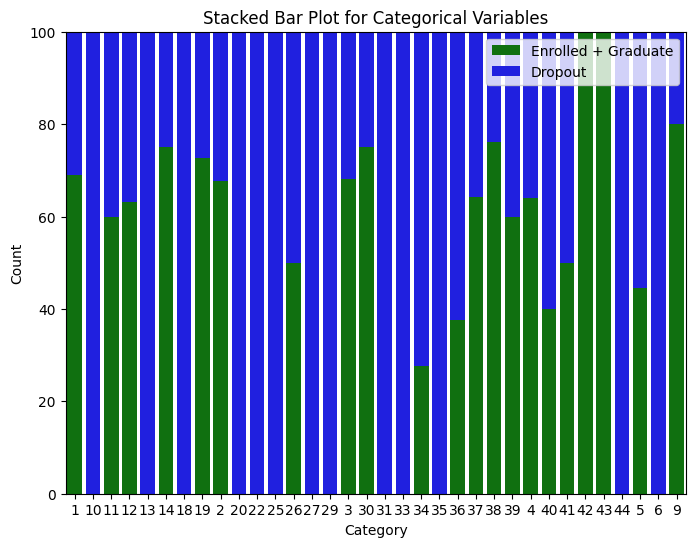

In [72]:
plt.figure(figsize=(8, 6))
sns.set_palette('pastel')
sns.barplot(x=cross_tab_normalize.index, y=cross_tab_normalize['Enrolled + Graduate'], color='green', 
            label='Enrolled + Graduate')
sns.barplot(x=cross_tab_normalize.index, y=cross_tab_normalize['Dropout'], color='blue', label='Dropout',
            bottom=cross_tab_normalize['Enrolled + Graduate'])
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Stacked Bar Plot for Categorical Variables')
plt.legend()
plt.show()

In [73]:
cross_tab_normalize[cross_tab_normalize.Dropout > 70]

Target,Dropout,Enrolled + Graduate
row_0,,
10,100.000000,0.000000
13,100.000000,0.000000
18,100.000000,0.000000
20,100.000000,0.000000
22,100.000000,0.000000
25,100.000000,0.000000
27,100.000000,0.000000
29,100.000000,0.000000
31,100.000000,0.000000


In [74]:
fathers_qualification_mapping[fathers_qualification_mapping.Value.\
                              isin(cross_tab_normalize[cross_tab_normalize.Dropout > 70].index.astype(int).values.tolist())]

,fathers_qualification,Value
5,Frequency of Higher Education,6
7,11th Year of Schooling - Not Completed,10
10,2nd year complementary high school course,13
12,General commerce course,18
14,Complementary High School Course,20
15,Technical-professional course,22
16,Complementary High School Course - not concluded,25
18,2nd cycle of the general high school course,27
19,9th Year of Schooling - Not Completed,29
21,General Course of Administration and Commerce,31


Candidates having fathers qualification as above are highly likely to drop out.

#### Mother\'s occupation

In [75]:
cat_df = df[['Mother\'s occupation', 'Target']].set_index('Mother\'s occupation')\
.join(mothers_occupation_mapping.set_index('Value'))

In [76]:
cross_tab = pd.crosstab(cat_df.index.astype(str), cat_df['Target'])
cross_tab_normalize = pd.crosstab(cat_df.index.astype(str), cat_df['Target'], normalize='index') * 100

In [77]:
cross_tab_normalize

Target,Dropout,Enrolled + Graduate
row_0,,
0,68.750000,31.250000
1,38.235294,61.764706
10,25.000000,75.000000
122,0.000000,100.000000
123,28.571429,71.428571
125,0.000000,100.000000
131,0.000000,100.000000
132,0.000000,100.000000
134,25.000000,75.000000


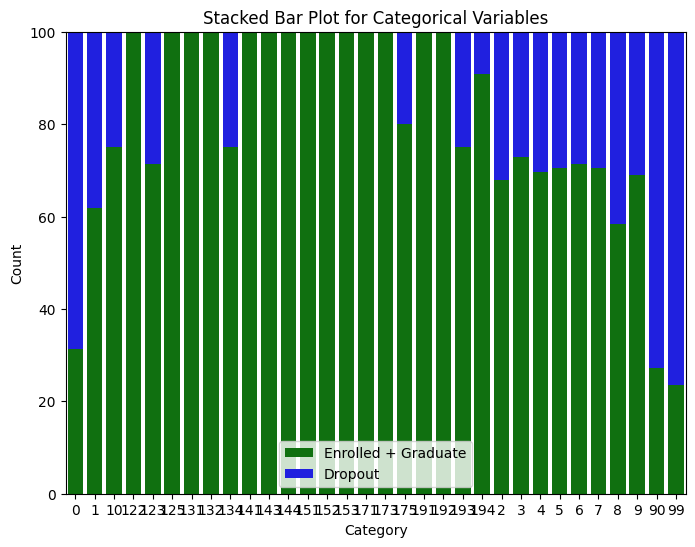

In [78]:
plt.figure(figsize=(8, 6))
sns.set_palette('pastel')
sns.barplot(x=cross_tab_normalize.index, y=cross_tab_normalize['Enrolled + Graduate'], color='green', 
            label='Enrolled + Graduate')
sns.barplot(x=cross_tab_normalize.index, y=cross_tab_normalize['Dropout'], color='blue', label='Dropout',
            bottom=cross_tab_normalize['Enrolled + Graduate'])
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Stacked Bar Plot for Categorical Variables')
plt.legend()
plt.show()

In [79]:
cross_tab_normalize[cross_tab_normalize.Dropout > 70]

Target,Dropout,Enrolled + Graduate
row_0,,
90,72.857143,27.142857
99,76.470588,23.529412


In [80]:
mothers_occupation_mapping[mothers_occupation_mapping.Value.\
                              isin(cross_tab_normalize[cross_tab_normalize.Dropout > 70]
                                   .index.astype(int).values.tolist())]

,mothers_occupation,Value
11,Other Situation,90
12,(blank),99


Candidates having mothers occupation as above are highly likely to drop out.

#### Father\'s occupation

In [81]:
cat_df = df[['Father\'s occupation', 'Target']].set_index('Father\'s occupation')\
.join(fathers_occupation_mapping.set_index('Value'))

In [82]:
cross_tab = pd.crosstab(cat_df.index.astype(str), cat_df['Target'])
cross_tab_normalize = pd.crosstab(cat_df.index.astype(str), cat_df['Target'], normalize='index') * 100

In [83]:
cross_tab_normalize

Target,Dropout,Enrolled + Graduate
row_0,,
0,64.062500,35.937500
1,35.820896,64.179104
10,31.954887,68.045113
101,0.000000,100.000000
102,0.000000,100.000000
103,25.000000,75.000000
112,50.000000,50.000000
114,0.000000,100.000000
121,0.000000,100.000000


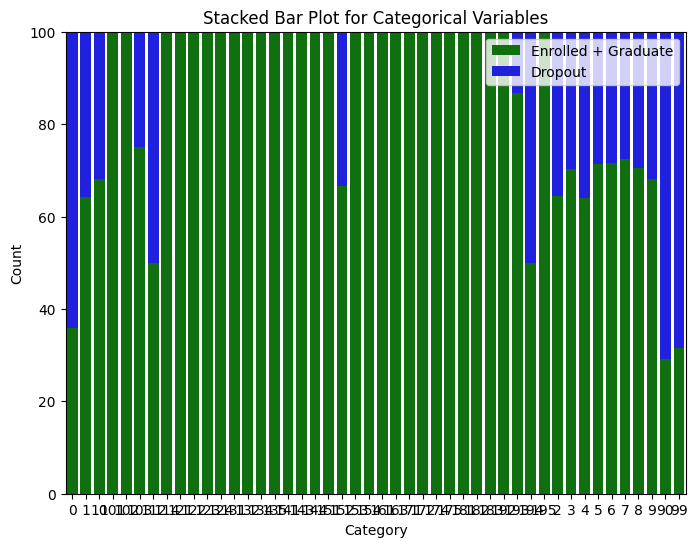

In [84]:
plt.figure(figsize=(8, 6))
sns.set_palette('pastel')
sns.barplot(x=cross_tab_normalize.index, y=cross_tab_normalize['Enrolled + Graduate'], color='green', 
            label='Enrolled + Graduate')
sns.barplot(x=cross_tab_normalize.index, y=cross_tab_normalize['Dropout'], color='blue', label='Dropout',
            bottom=cross_tab_normalize['Enrolled + Graduate'])
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Stacked Bar Plot for Categorical Variables')
plt.legend()
plt.show()

In [85]:
cross_tab_normalize[cross_tab_normalize.Dropout > 70]

Target,Dropout,Enrolled + Graduate
row_0,,
90,70.769231,29.230769


In [86]:
fathers_occupation_mapping[fathers_occupation_mapping.Value.\
                              isin(cross_tab_normalize[cross_tab_normalize.Dropout > 70]
                                   .index.astype(int).values.tolist())]

,fathers_occupation,Value
11,Other Situation,90


Candidates having fathers occupation as above are highly likely to drop out.

### Visulize continuous independent variables

In [87]:
multi_categorical_features = ['Marital status', 'Application mode', 'Course',  
                                'Previous qualification', 'Nacionality', 'Mother\'s qualification', 
                                'Father\'s qualification', 'Mother\'s occupation', 
                                'Father\'s occupation'] 

dual_category_features = ['Daytime/evening attendance\t', 'Displaced', 'Educational special needs', 
                            'Debtor', 'Tuition fees up to date', 'Gender', 'Scholarship holder', 'International']

remaining = list(set(df.columns.tolist()) - set(multi_categorical_features) - 
                 set(dual_category_features))


In [88]:
remaining

['Curricular units 1st sem (enrolled)',
 'Curricular units 1st sem (approved)',
 'Application order',
 'Curricular units 2nd sem (evaluations)',
 'Curricular units 2nd sem (approved)',
 'Previous qualification (grade)',
 'Curricular units 2nd sem (credited)',
 'Admission grade',
 'Unemployment rate',
 'Curricular units 2nd sem (without evaluations)',
 'Inflation rate',
 'Curricular units 2nd sem (enrolled)',
 'Curricular units 2nd sem (grade)',
 'Target',
 'Curricular units 1st sem (evaluations)',
 'Age at enrollment',
 'Curricular units 1st sem (without evaluations)',
 'Curricular units 1st sem (grade)',
 'Curricular units 1st sem (credited)',
 'GDP']

In [89]:
continuous_variables = remaining.copy()
continuous_variables.remove('Target')

In [90]:
# continuous_variables = remaining.remove('Target')

Curricular units 1st sem (enrolled)


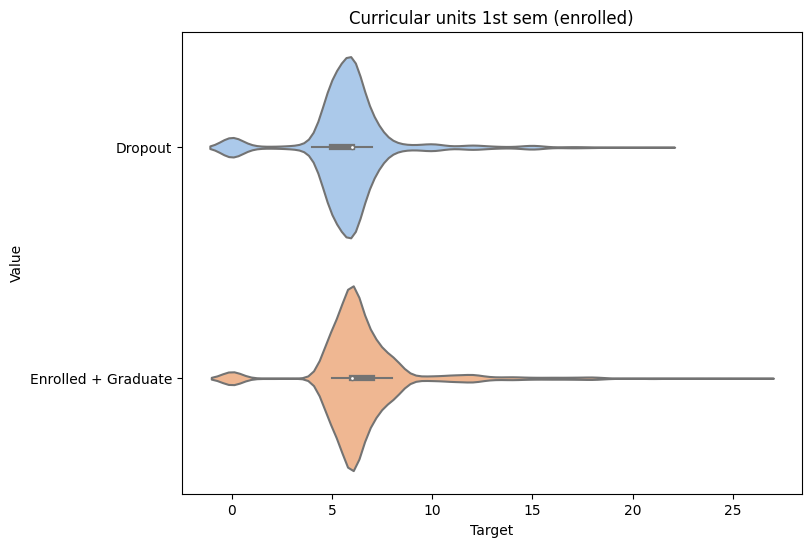

Curricular units 1st sem (approved)


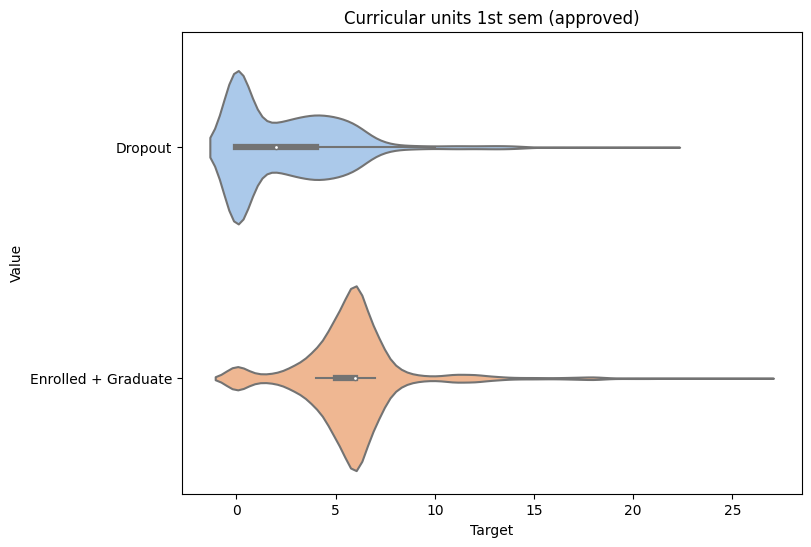

Application order


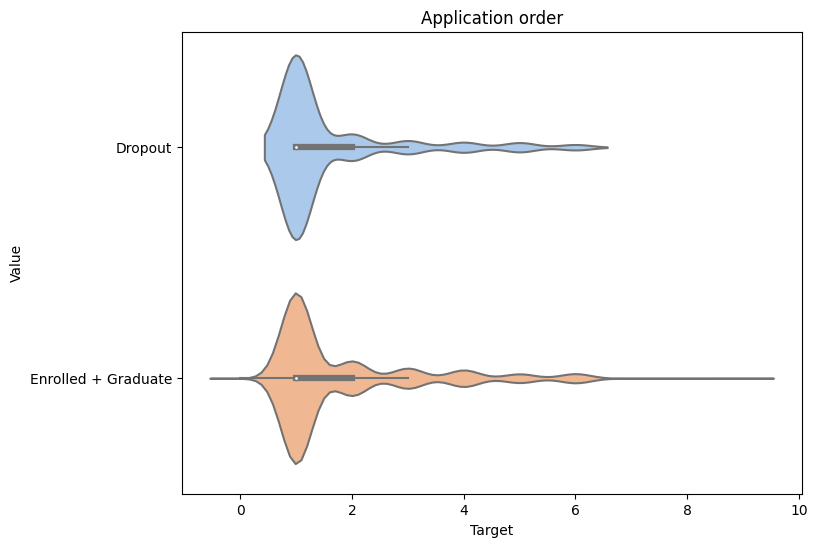

Curricular units 2nd sem (evaluations)


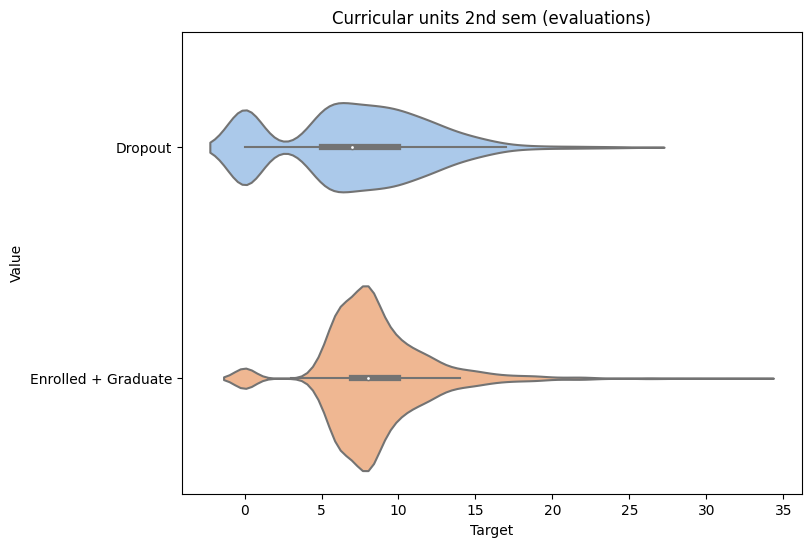

Curricular units 2nd sem (approved)


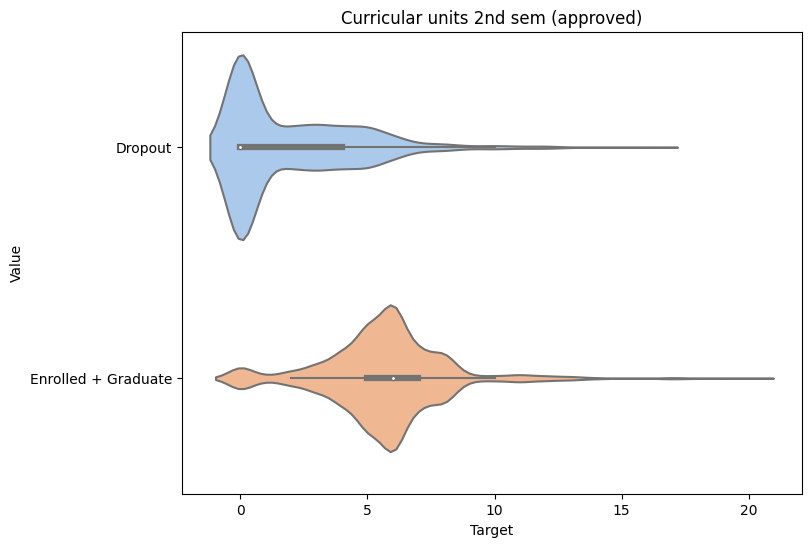

Previous qualification (grade)


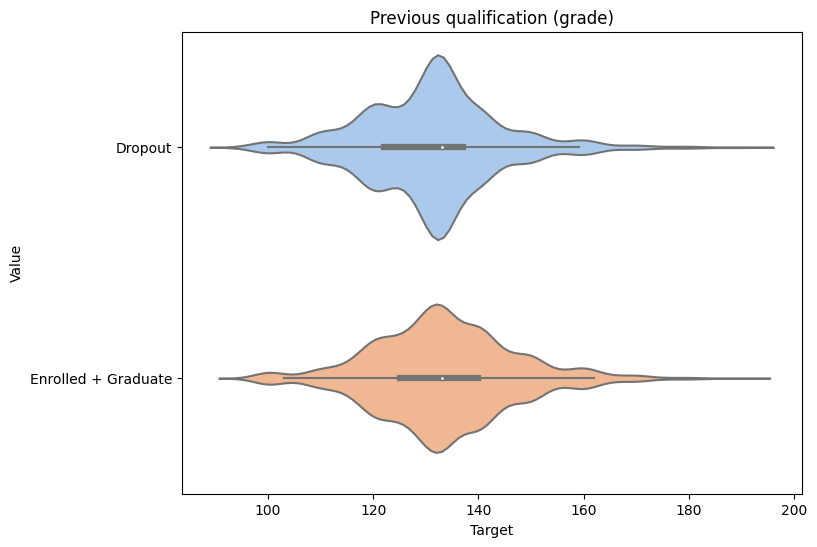

Curricular units 2nd sem (credited)


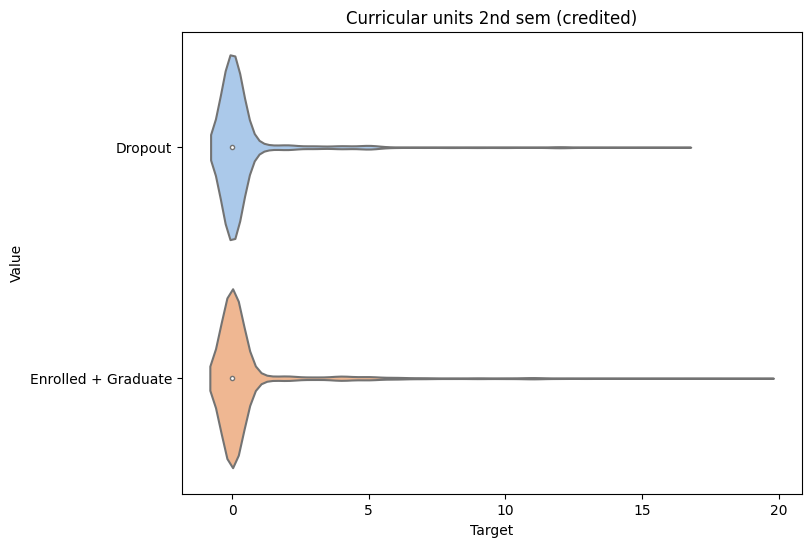

Admission grade


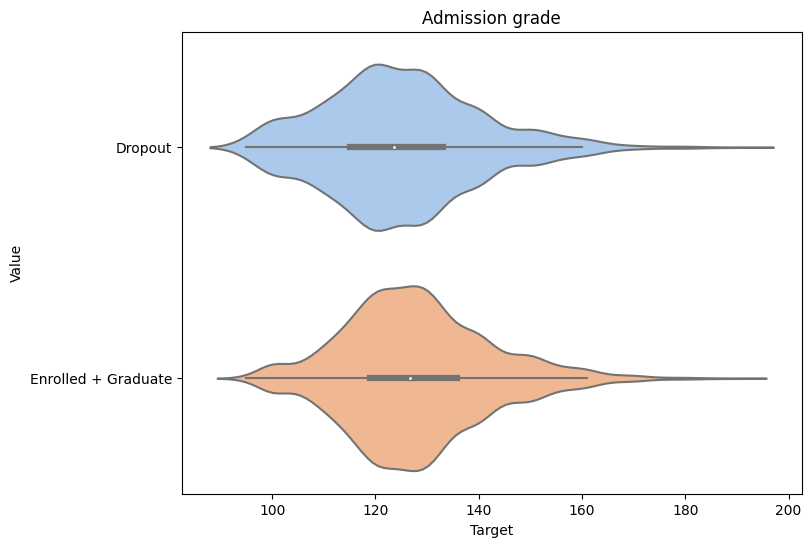

Unemployment rate


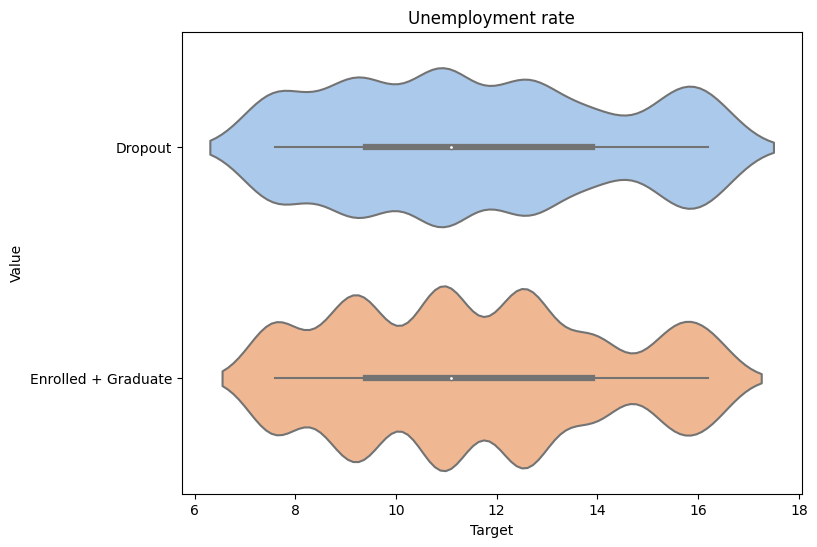

Curricular units 2nd sem (without evaluations)


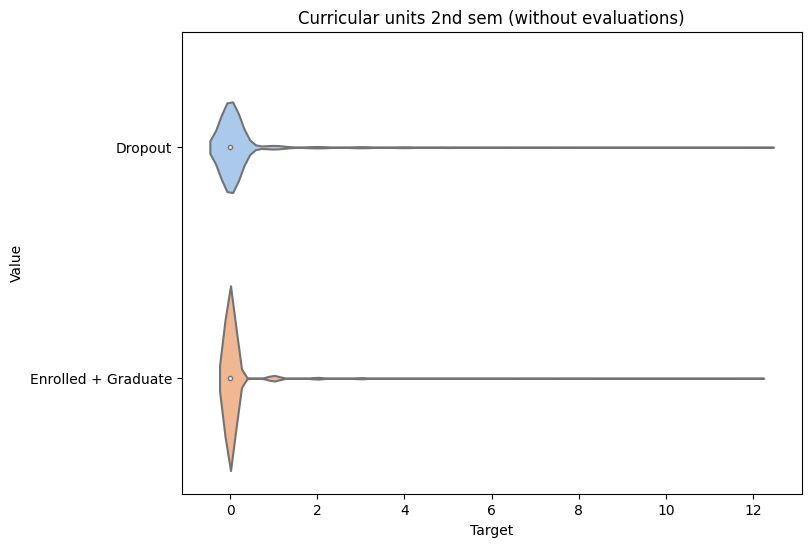

Inflation rate


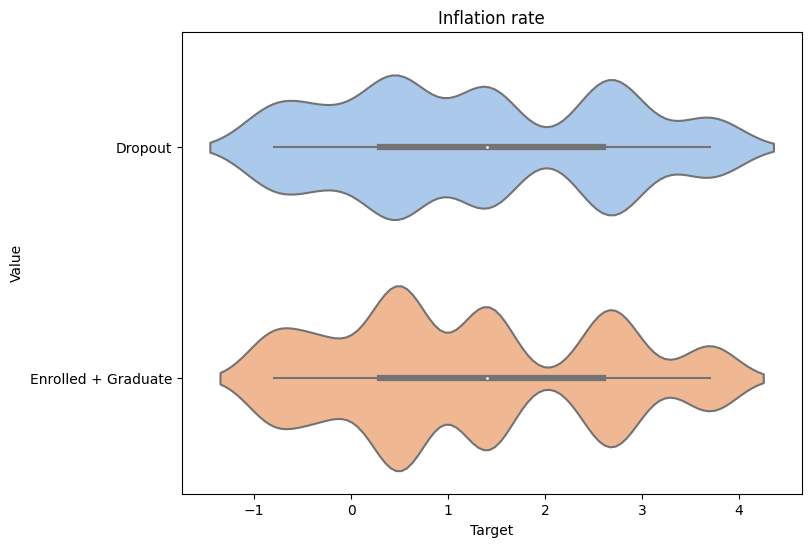

Curricular units 2nd sem (enrolled)


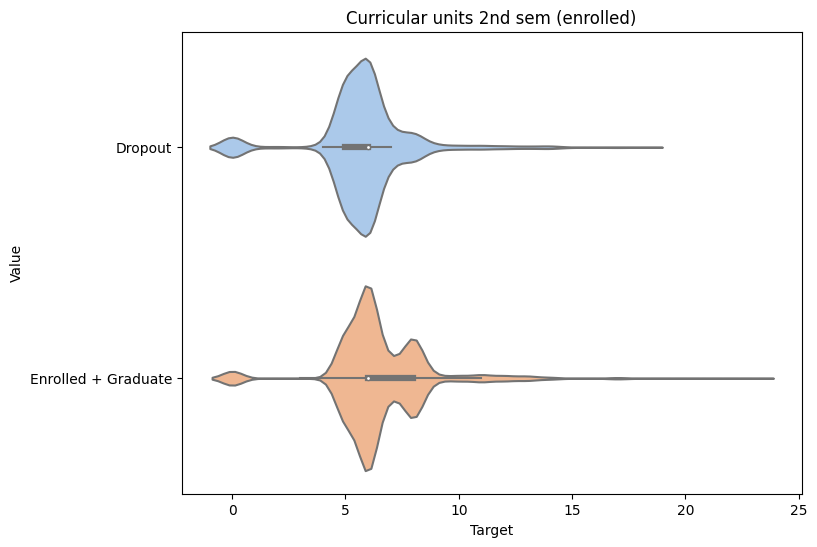

Curricular units 2nd sem (grade)


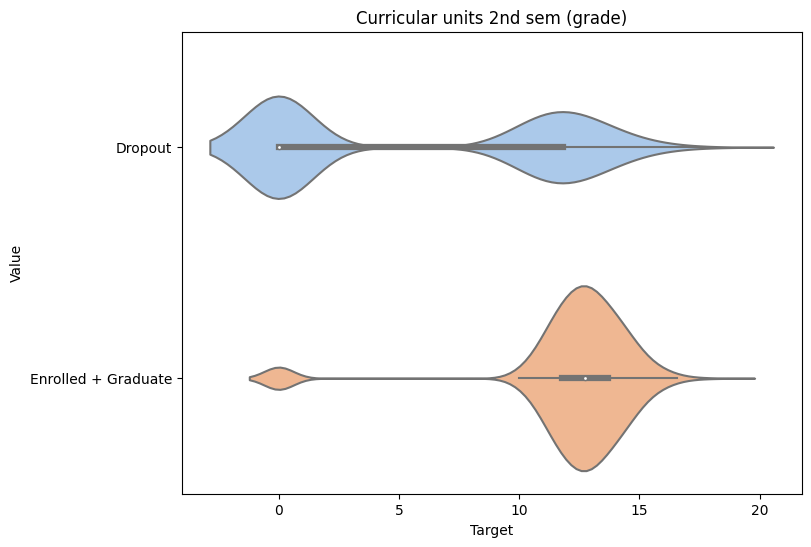

Curricular units 1st sem (evaluations)


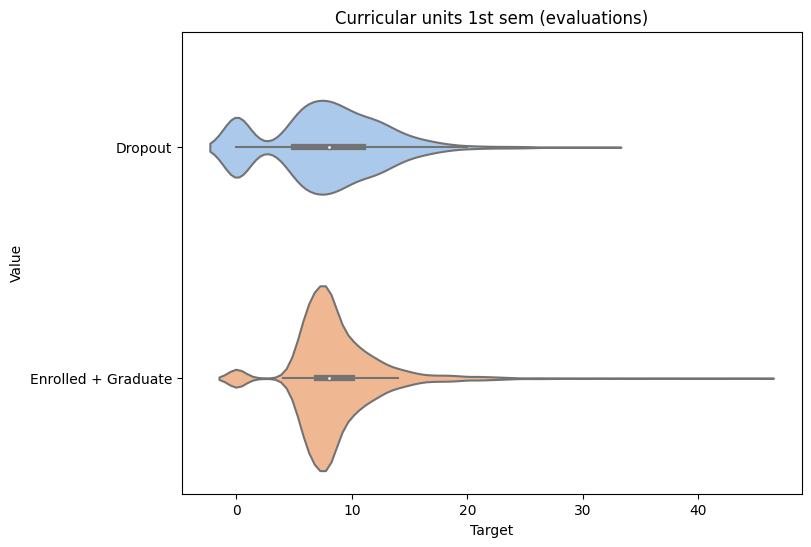

Age at enrollment


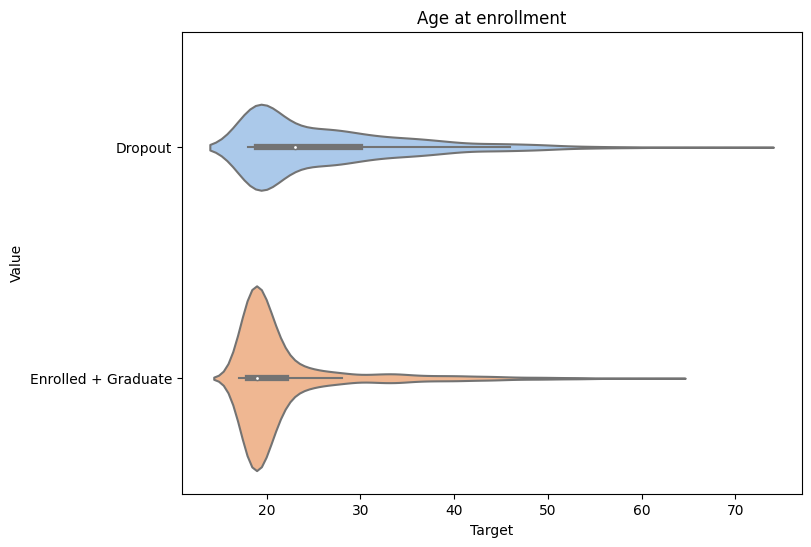

Curricular units 1st sem (without evaluations)


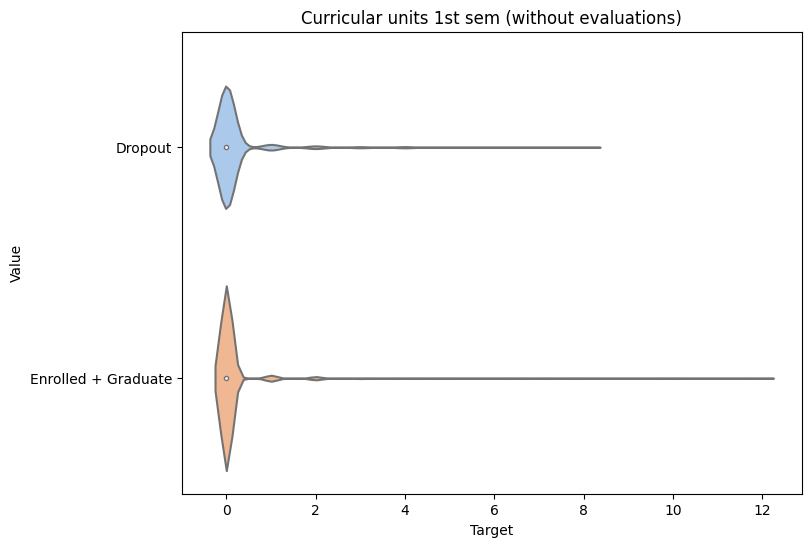

Curricular units 1st sem (grade)


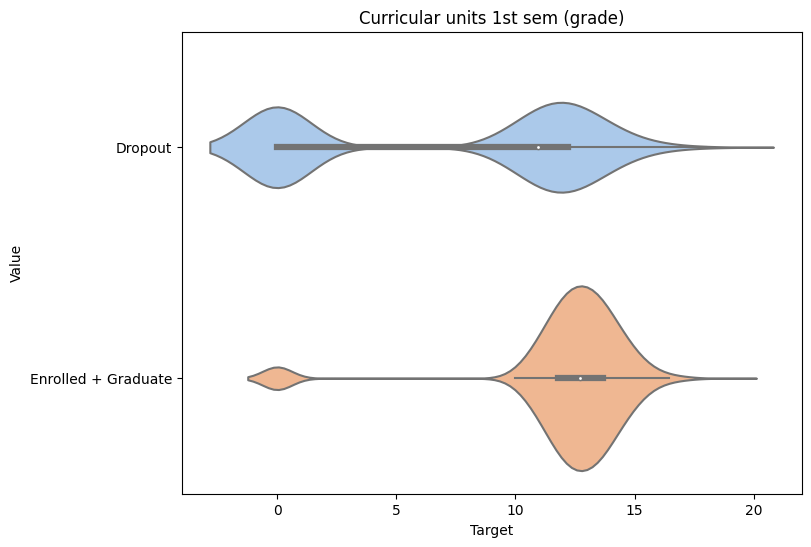

Curricular units 1st sem (credited)


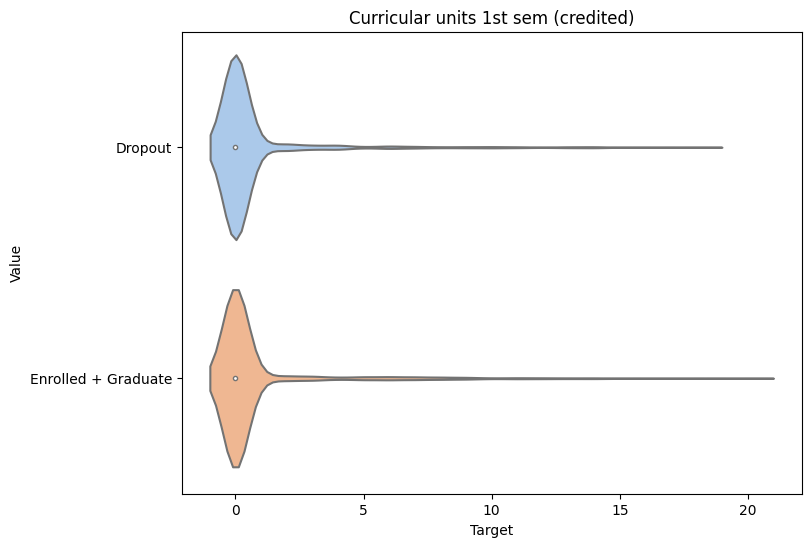

GDP


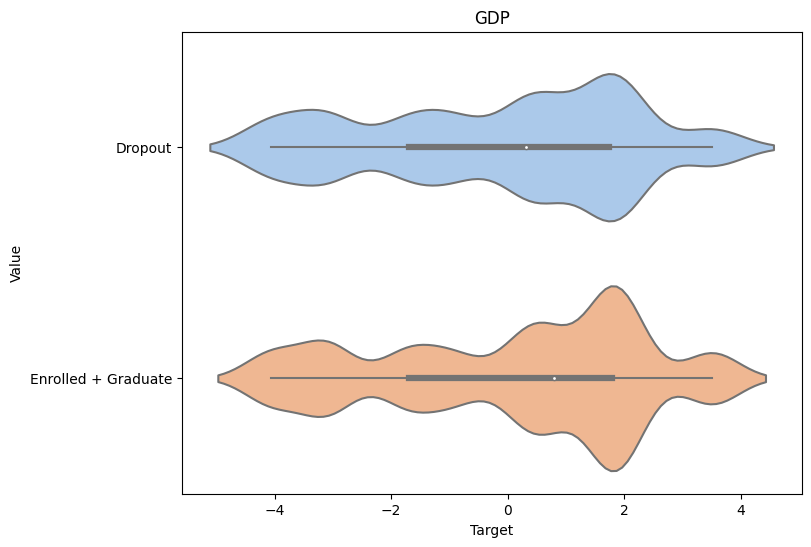

In [91]:
# Create the violin plot
for col in continuous_variables:
    print(col)
    plt.figure(figsize=(8, 6))
    sns.set_palette('pastel')
    sns.violinplot(x=col, y='Target', data=df)
    plt.xlabel('Target')
    plt.ylabel('Value')
    plt.title(col)
    plt.show()

Curricular units 2nd sem (approved) and Curricular units 2nd sem (grade) seem to differentiate quite well between 2 classes

### Convert multi category features to binary

In [92]:
model_df = df.copy()

In [93]:
model_df['Target'] = np.where(model_df['Target'] == 'Dropout', 1, 0)

In [94]:
for col in multi_categorical_features:
    model_df[col] = model_df[col].astype(str)

In [95]:
model_df[remaining + dual_category_features + multi_categorical_features]

,Curricular units 1st sem (enrolled),Curricular units 1st sem (approved),Application order,Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Previous qualification (grade),Curricular units 2nd sem (credited),Admission grade,Unemployment rate,Curricular units 2nd sem (without evaluations),...,International,Marital status,Application mode,Course,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,Father's occupation
0,0,0,5,0,0,122.0,0,127.3,10.8,0,...,0,1,17,171,1,1,19,12,5,9
1,6,6,1,6,6,160.0,0,142.5,13.9,0,...,0,1,15,9254,1,1,1,3,3,3
2,6,0,5,0,0,122.0,0,124.8,10.8,0,...,0,1,1,9070,1,1,37,37,9,9
3,6,6,2,10,5,122.0,0,119.6,9.4,0,...,0,1,17,9773,1,1,38,37,5,3
4,6,5,1,6,6,100.0,0,141.5,13.9,0,...,0,2,39,8014,1,1,37,38,9,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,6,5,6,8,5,125.0,0,122.2,15.5,0,...,0,1,1,9773,1,1,1,1,5,4
4420,6,6,2,6,2,120.0,0,119.0,11.1,0,...,1,1,1,9773,1,105,1,1,9,9
4421,7,7,1,9,1,154.0,0,149.5,13.9,0,...,0,1,1,9500,1,1,37,37,9,9
4422,5,5,1,6,5,180.0,0,153.8,9.4,0,...,0,1,1,9147,1,1,37,37,7,4


In [96]:
model_df = pd.get_dummies(model_df)

### Based on the above plots we will identify the important features for our predictive model

Following are the extracted important features\
Application mode [26, 27]\
Previous Qualification [10, 14, 5, 9]\
Nationality [109, 17]\
Mother's Qualitifcation [18, 27, 34, 44, 6]\
Father's Qulification [10, 13, 18, 20, 22, 25, 27, 29, 31, 33, 34, 35,  44, 6]\
Mother's Occupation [90, 99]\
Father's Occupation [90]

In [97]:
filtered_multi_category_features = ['Application mode_26', 'Application mode_27', 'Previous qualification_10',
                                    'Previous qualification_14', 'Previous qualification_5', 
                                    'Previous qualification_9', 'Nacionality_109', 'Nacionality_17',
                                    'Mother\'s qualification_18', 'Mother\'s qualification_27', 
                                    'Mother\'s qualification_34', 'Mother\'s qualification_44',
                                   'Mother\'s qualification_6', 'Father\'s qualification_10', 
                                    'Father\'s qualification_13', 'Father\'s qualification_18',
                                   'Father\'s qualification_20', 'Father\'s qualification_22',
                                   'Father\'s qualification_25', 'Father\'s qualification_27',
                                   'Father\'s qualification_29', 'Father\'s qualification_31',
                                   'Father\'s qualification_33', 'Father\'s qualification_34',
                                   'Father\'s qualification_35', 'Father\'s qualification_44',
                                   'Father\'s qualification_6', 'Mother\'s occupation_90', 'Mother\'s occupation_99',
                                   'Father\'s occupation_90']

In [98]:
type(filtered_multi_category_features)

list

In [99]:
model_df[filtered_multi_category_features]

,Application mode_26,Application mode_27,Previous qualification_10,Previous qualification_14,Previous qualification_5,Previous qualification_9,Nacionality_109,Nacionality_17,Mother's qualification_18,Mother's qualification_27,...,Father's qualification_29,Father's qualification_31,Father's qualification_33,Father's qualification_34,Father's qualification_35,Father's qualification_44,Father's qualification_6,Mother's occupation_90,Mother's occupation_99,Father's occupation_90
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4420,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4421,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4422,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [100]:
model_df.columns.tolist()

['Application order',
 'Daytime/evening attendance\t',
 'Previous qualification (grade)',
 'Admission grade',
 'Displaced',
 'Educational special needs',
 'Debtor',
 'Tuition fees up to date',
 'Gender',
 'Scholarship holder',
 'Age at enrollment',
 'International',
 'Curricular units 1st sem (credited)',
 'Curricular units 1st sem (enrolled)',
 'Curricular units 1st sem (evaluations)',
 'Curricular units 1st sem (approved)',
 'Curricular units 1st sem (grade)',
 'Curricular units 1st sem (without evaluations)',
 'Curricular units 2nd sem (credited)',
 'Curricular units 2nd sem (enrolled)',
 'Curricular units 2nd sem (evaluations)',
 'Curricular units 2nd sem (approved)',
 'Curricular units 2nd sem (grade)',
 'Curricular units 2nd sem (without evaluations)',
 'Unemployment rate',
 'Inflation rate',
 'GDP',
 'Target',
 'Marital status_1',
 'Marital status_2',
 'Marital status_3',
 'Marital status_4',
 'Marital status_5',
 'Marital status_6',
 'Application mode_1',
 'Application mode_10'

## Handle Class Imbalance

In [102]:
from imblearn.over_sampling import SMOTE

In [103]:
Y = model_df['Target']
X = model_df[filtered_multi_category_features + dual_category_features + continuous_variables]

In [104]:
print('Drop Out cases = ' + str(model_df[model_df.Target == 1].shape[0]))
print('Enrolled + Graduate cases = ' + str(model_df[model_df.Target == 0].shape[0]))

Drop Out cases = 1421
Enrolled + Graduate cases = 3003


In [105]:
sm = SMOTE(random_state=0)
X_resampled, Y_resampled = sm.fit_resample(X, Y)

In [106]:
resampled_df = pd.concat([X_resampled, Y_resampled], axis=1)

In [107]:
resampled_df.shape

(6006, 58)

In [108]:
Y_resampled

0       1
1       0
2       1
3       0
4       0
       ..
6001    1
6002    1
6003    1
6004    1
6005    1
Name: Target, Length: 6006, dtype: int32

In [109]:
print('Drop Out cases = ' + str(resampled_df[resampled_df.Target == 1].shape[0]))
print('Enrolled + Graduate cases = ' + str(resampled_df[resampled_df.Target == 0].shape[0]))

Drop Out cases = 3003
Enrolled + Graduate cases = 3003


## Train-Test Split

In [110]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_resampled, Y_resampled, test_size=0.2, random_state=0)

In [111]:
resampled_df_train = pd.concat([X_train, y_train], axis=1)
resampled_df_test = pd.concat([X_test, y_test], axis=1)

## Min-Max Scaling

In [112]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled_continuous = scaler.fit_transform(X_train[continuous_variables])
X_test_scaled_continuous = scaler.transform(X_test[continuous_variables])

In [113]:
X_test_scaled_continuous

array([[0.30769231, 0.26923077, 0.16666667, ..., 0.76291391, 0.        ,
        0.31175694],
       [0.23076923, 0.        , 0.16666667, ..., 0.        , 0.        ,
        0.77278732],
       [0.26923077, 0.19230769, 0.33333333, ..., 0.70675497, 0.        ,
        0.77278732],
       ...,
       [0.23076923, 0.        , 0.16666667, ..., 0.        , 0.        ,
        0.41479524],
       [0.23076923, 0.15384615, 0.16666667, ..., 0.66225166, 0.        ,
        0.80317041],
       [0.23076923, 0.11538462, 0.16666667, ..., 0.6290938 , 0.        ,
        0.57859974]])

In [114]:
resampled_df_train = pd.concat([resampled_df_train[filtered_multi_category_features 
                                                   + dual_category_features].reset_index(drop=True), 
                                pd.DataFrame(X_train_scaled_continuous, columns = continuous_variables),
                               resampled_df_train['Target'].reset_index(drop=True)], axis=1)
resampled_df_test = pd.concat([resampled_df_test[filtered_multi_category_features 
                                                   + dual_category_features].reset_index(drop=True), 
                                pd.DataFrame(X_test_scaled_continuous, columns = continuous_variables), 
                              resampled_df_test['Target'].reset_index(drop=True)], axis=1)

In [115]:
resampled_df_test

,Application mode_26,Application mode_27,Previous qualification_10,Previous qualification_14,Previous qualification_5,Previous qualification_9,Nacionality_109,Nacionality_17,Mother's qualification_18,Mother's qualification_27,...,Inflation rate,Curricular units 2nd sem (enrolled),Curricular units 2nd sem (grade),Curricular units 1st sem (evaluations),Age at enrollment,Curricular units 1st sem (without evaluations),Curricular units 1st sem (grade),Curricular units 1st sem (credited),GDP,Target
0,False,False,False,False,False,False,False,False,False,False,...,1.000000,0.347826,0.775385,0.177778,0.037736,0.0,0.762914,0.0,0.311757,0
1,False,False,False,False,False,False,False,False,False,False,...,0.288889,0.260870,0.000000,0.000000,0.207547,0.0,0.000000,0.0,0.772787,1
2,False,False,False,False,False,False,False,False,False,False,...,0.288889,0.304348,0.666923,0.200000,0.037736,0.0,0.706755,0.0,0.772787,0
3,False,False,False,False,False,False,False,False,False,False,...,0.311111,0.260870,0.691026,0.244444,0.113208,0.0,0.629139,0.0,0.803170,1
4,False,False,False,False,False,False,False,False,False,False,...,1.000000,0.347826,0.809231,0.177778,0.056604,0.0,0.796216,0.0,0.311757,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1197,False,False,False,False,False,False,False,False,False,False,...,0.488889,0.347826,0.695077,0.244444,0.018868,0.0,0.683898,0.0,0.766182,0
1198,False,False,False,False,False,False,False,False,False,False,...,0.488889,0.217391,0.000000,0.111111,0.396226,0.0,0.000000,0.0,1.000000,1
1199,False,False,False,False,False,False,False,False,False,False,...,0.244444,0.217391,0.000000,0.177778,0.188679,0.0,0.000000,0.0,0.414795,1
1200,False,False,False,False,False,False,False,False,False,False,...,0.311111,0.260870,0.682051,0.266667,0.075472,0.0,0.662252,0.0,0.803170,0


In [116]:
resampled_df_train.describe().T['max']

Daytime/evening attendance\t                      1.0
Displaced                                         1.0
Educational special needs                         1.0
Debtor                                            1.0
Tuition fees up to date                           1.0
Gender                                            1.0
Scholarship holder                                1.0
International                                     1.0
Curricular units 1st sem (enrolled)               1.0
Curricular units 1st sem (approved)               1.0
Application order                                 1.0
Curricular units 2nd sem (evaluations)            1.0
Curricular units 2nd sem (approved)               1.0
Previous qualification (grade)                    1.0
Curricular units 2nd sem (credited)               1.0
Admission grade                                   1.0
Unemployment rate                                 1.0
Curricular units 2nd sem (without evaluations)    1.0
Inflation rate              

In [117]:
resampled_df_test.describe().T

,count,mean,std,min,25%,50%,75%,max
Daytime/evening attendance\t,1202.0,0.848586,0.358601,0.000000,1.000000,1.000000,1.000000,1.000000
Displaced,1202.0,0.455907,0.498259,0.000000,0.000000,0.000000,1.000000,1.000000
Educational special needs,1202.0,0.009151,0.095264,0.000000,0.000000,0.000000,0.000000,1.000000
Debtor,1202.0,0.105657,0.307526,0.000000,0.000000,0.000000,0.000000,1.000000
Tuition fees up to date,1202.0,0.768719,0.421827,0.000000,1.000000,1.000000,1.000000,1.000000
Gender,1202.0,0.355241,0.478786,0.000000,0.000000,0.000000,1.000000,1.000000
Scholarship holder,1202.0,0.181364,0.385480,0.000000,0.000000,0.000000,0.000000,1.000000
International,1202.0,0.019967,0.139944,0.000000,0.000000,0.000000,0.000000,1.000000
Curricular units 1st sem (enrolled),1202.0,0.231057,0.087704,0.000000,0.192308,0.230769,0.230769,0.807692
Curricular units 1st sem (approved),1202.0,0.154486,0.117504,0.000000,0.038462,0.153846,0.230769,0.807692


## Catboost

In [118]:
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

ModuleNotFoundError: No module named 'catboost'

In [108]:
# Create and train the CatBoostClassifier
X_train = resampled_df_train.iloc[:,:-1]
y_train = resampled_df_train.iloc[:,-1:]
X_test = resampled_df_test.iloc[:,:-1]
y_test = resampled_df_test.iloc[:,-1:]

In [109]:
clf = CatBoostClassifier(iterations=100, depth=3, learning_rate=0.1, loss_function='Logloss', random_state=42)
clf.fit(X_train, y_train, verbose=False)

In [110]:
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.89

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.91      0.89       595
           1       0.91      0.86      0.88       607

    accuracy                           0.89      1202
   macro avg       0.89      0.89      0.89      1202
weighted avg       0.89      0.89      0.89      1202


Confusion Matrix:
[[542  53]
 [ 85 522]]
